In [ ]:
import pandas as pd
import numpy as np


In [ ]:

# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/ccss.csv')

In [ ]:
df.head()

,id,content_type,category_id,category_name,grade_id,grade_name,item,description
0,CCSS.ELA-LITERACY.L.K.1,ELA-LITERACY,L,Language,K,Kindergarten,1,Demonstrate command of the conventions of stan...
1,CCSS.ELA-LITERACY.L.K.1.a,ELA-LITERACY,L,Language,K,Kindergarten,1a,Print many upper- and lowercase letters.
2,CCSS.ELA-LITERACY.L.K.1.b,ELA-LITERACY,L,Language,K,Kindergarten,1b,Use frequently occurring nouns and verbs.
3,CCSS.ELA-LITERACY.L.K.1.c,ELA-LITERACY,L,Language,K,Kindergarten,1c,Form regular plural nouns orally by adding /s/...
4,CCSS.ELA-LITERACY.L.K.1.d,ELA-LITERACY,L,Language,K,Kindergarten,1d,Understand and use question words (interrogati...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1554 non-null   object
 1   content_type   1554 non-null   object
 2   category_id    1554 non-null   object
 3   category_name  1554 non-null   object
 4   grade_id       1522 non-null   object
 5   grade_name     1522 non-null   object
 6   item           1554 non-null   object
 7   description    1554 non-null   object
dtypes: object(8)
memory usage: 97.2+ KB


In [ ]:
# Display basic statistics about the dataframe
print(df.describe(include='all'))

                                  id  content_type category_id category_name  \
count                           1554          1554        1554          1554   
unique                          1554             2          45            45   
top     CCSS.MATH.CONTENT.HSS.MD.B.7  ELA-LITERACY           L      Language   
freq                               1          1045         253           253   

       grade_id grade_name  item  \
count      1522       1522  1554   
unique       17         17   126   
top           3    Grade 3     3   
freq        129        129    74   

                                              description  
count                                                1554  
unique                                               1325  
top     Demonstrate command of the conventions of stan...  
freq                                                   12  


In [ ]:
# Check for missing values
print(df.isnull().sum())

id                0
content_type      0
category_id       0
category_name     0
grade_id         32
grade_name       32
item              0
description       0
dtype: int64


# Distribution of Categories

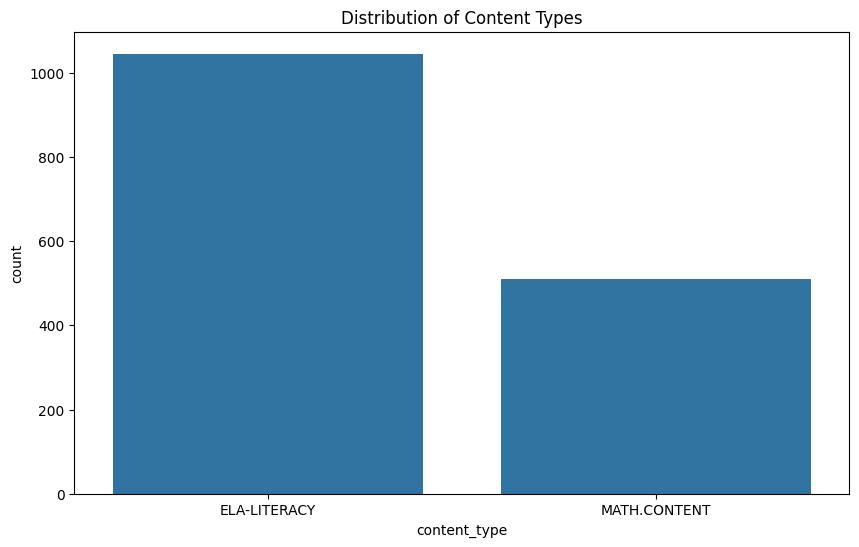

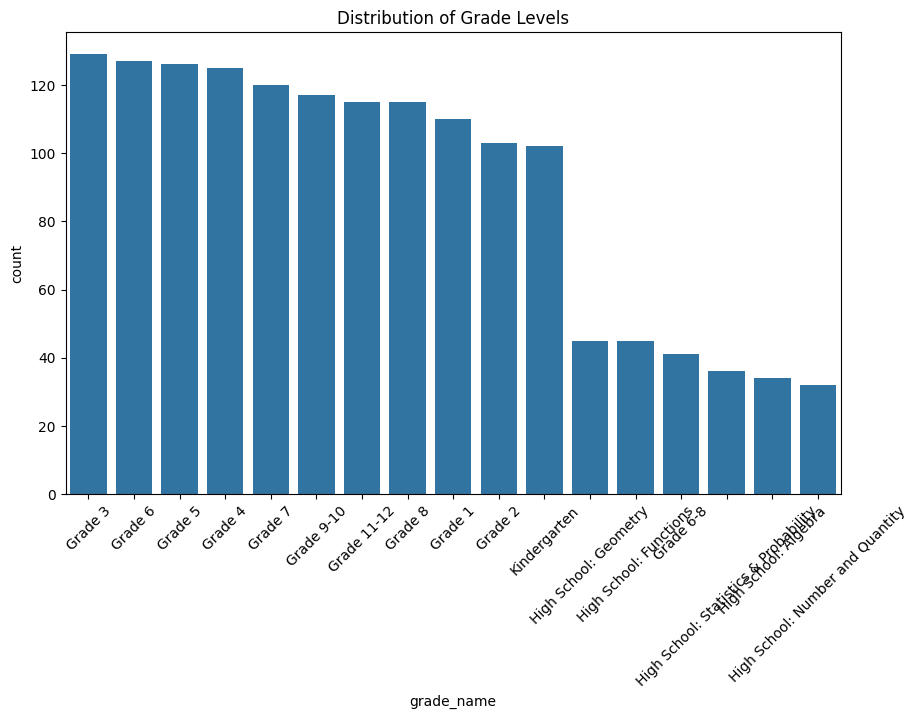

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of content types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='content_type')
plt.title('Distribution of Content Types')
plt.show()

# Plot the distribution of grade levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='grade_name', order=df['grade_name'].value_counts().index)
plt.title('Distribution of Grade Levels')
plt.xticks(rotation=45)
plt.show()

### Distribution of Content Types
##### 1. Dominance of ELA-LITERACY: The plot shows that the majority of the dataset consists of ELA-LITERACY content types, with over 1000 entries, and indicates a significant focus on English Language Arts in the dataset.

#####  2. Math Content: is considerably less represented, with fewer than 500 entries which suggests that the dataset is more heavily weighted towards literacy standards compared to math standards.

### Distribution of Grade Levels
##### 1. Grade Level Representation: It indicates that the dataset is comprehensive and covers a wide range of educational standards across different grade levels from Kindergarten to higher grades.

##### 2. The distribution allows for analysis specific to certain grade levels, which can be useful for targeted educational interventions.

 TEXT LENGTH ANALYSIS

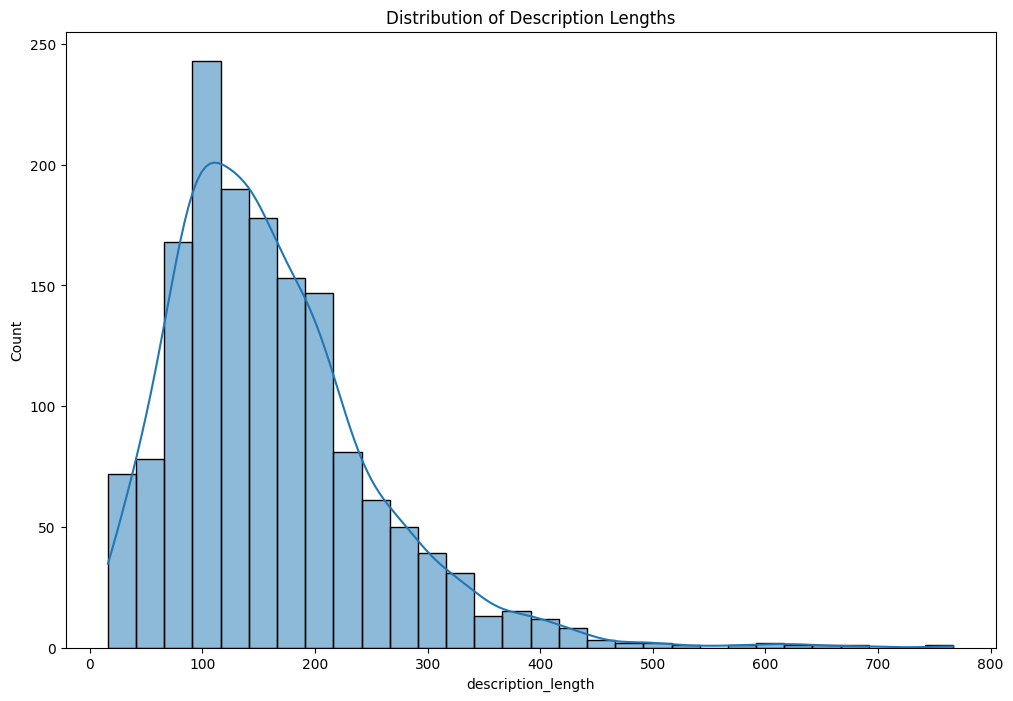

In [ ]:
# Add a column for the length of the descriptions
df['description_length'] = df['description'].apply(len)

# Plot the distribution of description lengths
plt.figure(figsize=(12, 8))
sns.histplot(df['description_length'], bins=30, kde=True)
plt.title('Distribution of Description Lengths')
plt.show()

######  1. The most common description length (mode) is between 100 and 150 characters, with a peak count of around 250 descriptions, and the majority of descriptions fall within 0 to 400 characters, indicating that most descriptions are relatively short.

######  2. The distribution is right-skewed, with more short descriptions and a tail extending towards longer lengths, including a few outliers reaching up to 700-800 characters.

######  3. The histogram with a fitted density curve shows a smooth, declining pattern after the peak, indicating a gradual decrease in frequency as description length increases.

# Word Cloud for Frequent Words


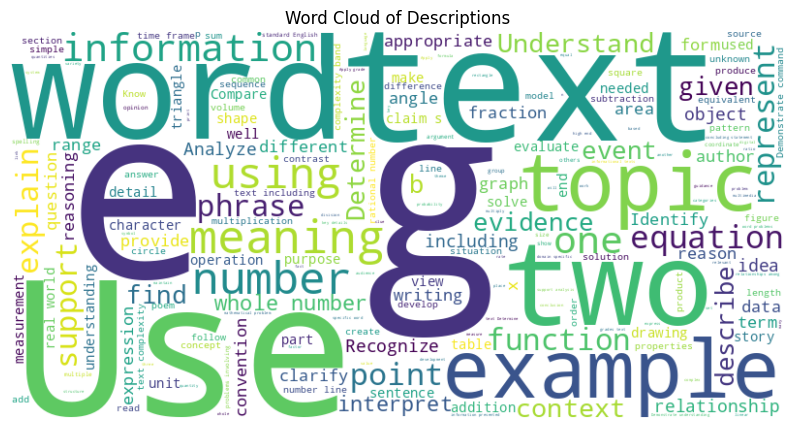

In [ ]:
from wordcloud import WordCloud

# Combine all descriptions into one string
text_combined = ' '.join(df['description'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()

# Text Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

df['processed_description'] = df['description'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


###### The preprocessing code cleans and standardizes text by tokenizing, converting to lowercase, removing stopwords, and lemmatizing. This prepares the text for effective feature extraction and model building.

#  Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_description'])

##### It is essential for transforming text data into a numerical format that can be processed by machine learning models. It enables the calculation of TF-IDF scores, which are used to measure the importance of terms and find similar descriptions based on cosine similarity. This transformation is a critical step in building and evaluating the text similarity model.

# Model Building

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def find_closest_ccss_ids(input_text, N):
    input_text_processed = preprocess_text(input_text)
    input_vector = vectorizer.transform([input_text_processed])
    similarities = cosine_similarity(input_vector, X).flatten()
    closest_indices = similarities.argsort()[-N:][::-1]
    return df.iloc[closest_indices][['id', 'description']]

# Example usage
input_text = "Understand and use question words"
N = 5
closest_ccss_ids = find_closest_ccss_ids(input_text, N)
print(closest_ccss_ids)

                            id  \
4    CCSS.ELA-LITERACY.L.K.1.d   
679  CCSS.ELA-LITERACY.L.8.5.b   
523  CCSS.ELA-LITERACY.L.6.5.b   
600  CCSS.ELA-LITERACY.L.7.5.b   
52    CCSS.ELA-LITERACY.RL.K.4   

                                           description  
4    Understand and use question words (interrogati...  
679  Use the relationship between particular words ...  
523  Use the relationship between particular words ...  
600  Use the relationship between particular words ...  
52   Ask and answer questions about unknown words i...  


###### The most similar CCSS descriptions to a given input text using cosine similarity on TF-IDF vectors, it helps in retrieving relevant educational standards based on user queries.

# Testing and Evaluation

In [ ]:
#Test with different input texts
test_texts = [
    "Use frequently occurring nouns and verbs",
    "Recognize and name end punctuation",
    "Capitalize the first word in a sentence",
    "Understand and use question words"
]

for text in test_texts:
    print(f"Input Text: {text}")
    closest_ccss_ids = find_closest_ccss_ids(text, N)
    print(closest_ccss_ids)
    print("\n")

Input Text: Use frequently occurring nouns and verbs
                           id  \
2   CCSS.ELA-LITERACY.L.K.1.b   
83  CCSS.ELA-LITERACY.L.1.1.f   
84  CCSS.ELA-LITERACY.L.1.1.g   
5   CCSS.ELA-LITERACY.L.K.1.e   
97  CCSS.ELA-LITERACY.L.1.4.b   

                                          description  
2           Use frequently occurring nouns and verbs.  
83               Use frequently occurring adjectives.  
84  Use frequently occurring conjunctions (e.g., a...  
5   Use the most frequently occurring prepositions...  
97  Use frequently occurring affixes as a clue to ...  


Input Text: Recognize and name end punctuation
                             id  \
9     CCSS.ELA-LITERACY.L.K.2.b   
90    CCSS.ELA-LITERACY.L.1.2.b   
26   CCSS.ELA-LITERACY.RF.K.1.d   
171   CCSS.ELA-LITERACY.L.2.2.a   
345   CCSS.ELA-LITERACY.L.4.3.b   

                                           description  
9                  Recognize and name end punctuation.  
90                  Use end punctuatio

###### Brief overview of Testing and evaluation
###### Testing the Model with Various Inputs:-
This step is crucial for understanding how well the model performs on different types of input data. Here are the steps involved:
1. Test Texts: A list of sentences is defined, each representing a different type of educational standard that might be in the dataset.
2. Finding Closest CCSS IDs: For each test text, the find_closest_ccss_ids function is called to find the most similar Common Core State Standards (CCSS) descriptions in the dataset.
3. Evaluation is based on the model's ability to return relevant and accurate descriptions for each test input.
4. Manual Inspection: The results for each input text are printed and manually inspected to assess the relevance and accuracy of the returned descriptions.

#### SUMMARY:-

The testing and evaluation process involves using a set of predefined test inputs to assess the model's ability to return relevant, accurate, and diverse descriptions. Manual inspection of the outputs helps in evaluating the model's performance and identifying areas for improvement. This process ensures that the model can reliably find and recommend educational standards based on input queries.
